In [28]:
## PULL CENSUS DATA

# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from census import Census
from us import states
import config

In [29]:
# CENSUS API KEY
c = Census(config.census_api)

In [30]:
'''
mil = c.acs5.get(fields = ('NAME', 'S0101_C01_001E', 'C17002_002E', 'C17002_003E', 'B01003_001E'),
                     geo={'for': 'tract:*',
                       'in': 'state:{} county:079'.format(states.WI.fips)})
'''
vars = ['NAME',
        'B01003_001E', 
        'B01001_002E', 
        'B01001_026E', 
        'B01002_001E', 
        'B06011_001E', 
        'B02001_002E' ,
        'B02001_003E', 
        'B02001_004E', 
        'B03001_003E', 
        'C17002_001E']
mil = c.acs5.state_county_tract(fields = vars,
                                state_fips= states.WI.fips,
                                county_fips= "079",
                                tract = "*",
                                year = 2020)                  

In [31]:
# Create a dataframe from the census data
mil_df = pd.DataFrame(mil)

# Show the dataframe
print(mil_df.head())
print('Shape: ', mil_df.shape)

                                             NAME  B01003_001E  B01001_002E  \
0  Census Tract 1.01, Milwaukee County, Wisconsin       4948.0       2299.0   
1  Census Tract 1.02, Milwaukee County, Wisconsin       3249.0       1478.0   
2  Census Tract 2.01, Milwaukee County, Wisconsin       5135.0       2483.0   
3  Census Tract 2.02, Milwaukee County, Wisconsin       7060.0       3121.0   
4  Census Tract 3.01, Milwaukee County, Wisconsin       1353.0        621.0   

   B01001_026E  B01002_001E  B06011_001E  B02001_002E  B02001_003E  \
0       2649.0         29.5      25185.0        928.0       3819.0   
1       1771.0         44.4      31261.0        861.0       1902.0   
2       2652.0         25.7      22861.0        848.0       3358.0   
3       3939.0         30.6      36821.0       2262.0       3820.0   
4        732.0         49.0      44458.0       1081.0        111.0   

   B02001_004E  B03001_003E  C17002_001E state county   tract  
0          0.0        169.0       4798.0

In [32]:
mil_df['GEOID'] = mil_df['state'] + mil_df['county'] + mil_df['tract']

mil_df.head()

,NAME,B01003_001E,B01001_002E,B01001_026E,B01002_001E,B06011_001E,B02001_002E,B02001_003E,B02001_004E,B03001_003E,C17002_001E,state,county,tract,GEOID
0,"Census Tract 1.01, Milwaukee County, Wisconsin",4948.0,2299.0,2649.0,29.5,25185.0,928.0,3819.0,0.0,169.0,4798.0,55,079,000101,55079000101
1,"Census Tract 1.02, Milwaukee County, Wisconsin",3249.0,1478.0,1771.0,44.4,31261.0,861.0,1902.0,21.0,331.0,3162.0,55,079,000102,55079000102
2,"Census Tract 2.01, Milwaukee County, Wisconsin",5135.0,2483.0,2652.0,25.7,22861.0,848.0,3358.0,0.0,728.0,5039.0,55,079,000201,55079000201
3,"Census Tract 2.02, Milwaukee County, Wisconsin",7060.0,3121.0,3939.0,30.6,36821.0,2262.0,3820.0,15.0,228.0,6926.0,55,079,000202,55079000202
4,"Census Tract 3.01, Milwaukee County, Wisconsin",1353.0,621.0,732.0,49.0,44458.0,1081.0,111.0,2.0,63.0,1353.0,55,079,000301,55079000301


In [33]:
shp_path = "/Users/eduardo/Documents/DSMPD/CrimeReportDS/data/shape_files/tl_2019_55_tract/tl_2019_55_tract.shp"

wi_tract = gpd.read_file(shp_path)

wi_tract = wi_tract.to_crs(epsg = 32617)

print(wi_tract.head())
print('Shape: ', wi_tract.shape)

print("\nThe shapefile projection is: {}".format(wi_tract.crs))

  STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  MTFCC  \
0      55      009  940002  55009940002  9400.02  Census Tract 9400.02  G5020   
1      55      009  001600  55009001600       16       Census Tract 16  G5020   
2      55      009  001801  55009001801    18.01    Census Tract 18.01  G5020   
3      55      009  001802  55009001802    18.02    Census Tract 18.02  G5020   
4      55      009  002001  55009002001    20.01    Census Tract 20.01  G5020   

  FUNCSTAT     ALAND    AWATER     INTPTLAT      INTPTLON  \
0        S  11512825     17646  +44.5153993  -088.1275536   
1        S   3642836     25211  +44.4885958  -087.9835008   
2        S  11455286     34950  +44.5146596  -087.9165411   
3        S  19656283  20676600  +44.5383388  -087.9846142   
4        S   6976236     13298  +44.4981471  -087.9606188   

                                            geometry  
0  POLYGON ((-68331.077 4953670.868, -68305.291 4...  
1  POLYGON ((-56827.962 4949861.951,

In [34]:
# Check column data types for census data
print("Column data types for census data:\n{}".format(mil_df.dtypes))

# Check column data types for census shapefile
print("\nColumn data types for census shapefile:\n{}".format(wi_tract.dtypes))

# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Column data types for census data:
NAME            object
B01003_001E    float64
B01001_002E    float64
B01001_026E    float64
B01002_001E    float64
B06011_001E    float64
B02001_002E    float64
B02001_003E    float64
B02001_004E    float64
B03001_003E    float64
C17002_001E    float64
state           object
county          object
tract           object
GEOID           object
dtype: object

Column data types for census shapefile:
STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object


In [35]:
# Join the attributes of the dataframes together
# Source: https://geopandas.org/docs/user_guide/mergingdata.html
mil_merge = wi_tract.merge(mil_df, on = "GEOID")

# Show result
mil_merge.head(2)
# print('Shape: ', mil_merge.shape)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,B01002_001E,B06011_001E,B02001_002E,B02001_003E,B02001_004E,B03001_003E,C17002_001E,state,county,tract
0,55,079,186900,55079186900,1869,Census Tract 1869,G5020,S,430121,0,...,57.5,48773.0,1809.0,121.0,0.0,64.0,1997.0,55,079,186900
1,55,079,187300,55079187300,1873,Census Tract 1873,G5020,S,7800888,0,...,41.5,44535.0,5526.0,75.0,69.0,546.0,6635.0,55,079,187300


In [36]:
# Create new dataframe from select columns

final_vars = ["STATEFP", "COUNTYFP", "TRACTCE", "GEOID", "geometry"]
final_df = mil_merge[["STATEFP", 
                      "COUNTYFP", 
                      "TRACTCE", 
                      "GEOID", 
                      "geometry", 
                      'B01003_001E', 
                      'B01001_002E', 
                      'B01001_026E', 
                      'B01002_001E', 
                      'B06011_001E', 
                      'B02001_002E' ,
                      'B02001_003E', 
                      'B02001_004E', 
                      'B03001_003E', 
                      'C17002_001E']]

# Show dataframe
print(final_df.head(2))
print('Shape: ', final_df.shape)

  STATEFP COUNTYFP TRACTCE        GEOID  \
0      55      079  186900  55079186900   
1      55      079  187300  55079187300   

                                            geometry  B01003_001E  \
0  POLYGON ((-62046.354 4788760.701, -62025.456 4...       2171.0   
1  POLYGON ((-70255.660 4770540.902, -70235.531 4...       6655.0   

   B01001_002E  B01001_026E  B01002_001E  B06011_001E  B02001_002E  \
0        827.0       1344.0         57.5      48773.0       1809.0   
1       3236.0       3419.0         41.5      44535.0       5526.0   

   B02001_003E  B02001_004E  B03001_003E  C17002_001E  
0        121.0          0.0         64.0       1997.0  
1         75.0         69.0        546.0       6635.0  
Shape:  (294, 15)


In [37]:
final_df.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,geometry,B01003_001E,B01001_002E,B01001_026E,B01002_001E,B06011_001E,B02001_002E,B02001_003E,B02001_004E,B03001_003E,C17002_001E
0,55,079,186900,55079186900,"POLYGON ((-62046.354 4788760.701, -62025.456 4...",2171.0,827.0,1344.0,57.5,48773.0,1809.0,121.0,0.0,64.0,1997.0
1,55,079,187300,55079187300,"POLYGON ((-70255.660 4770540.902, -70235.531 4...",6655.0,3236.0,3419.0,41.5,44535.0,5526.0,75.0,69.0,546.0,6635.0
2,55,079,160203,55079160203,"POLYGON ((-67682.874 4771857.981, -67681.909 4...",6565.0,3178.0,3387.0,32.8,39435.0,5381.0,402.0,50.0,744.0,6528.0
3,55,079,000102,55079000102,"POLYGON ((-71319.677 4801352.284, -71314.198 4...",3249.0,1478.0,1771.0,44.4,31261.0,861.0,1902.0,21.0,331.0,3162.0
4,55,079,120101,55079120101,"POLYGON ((-76752.579 4779862.776, -76752.072 4...",3997.0,1794.0,2203.0,51.1,40216.0,3569.0,62.0,0.0,121.0,3948.0


In [38]:
areas = [i.area for i in final_df['geometry']]
maxval = max(areas)

print([index for index, item in enumerate(areas) if item == maxval])


[26]


In [39]:
final_df.drop(26,axis=0,inplace=True)


/var/folders/xw/jpkqr5h567g4sy4sd31tjrxr0000gn/T/ipykernel_21907/3340401479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(26,axis=0,inplace=True)


Text(0.5, 1.0, 'Poverty Rates (%) in Milwaukee')

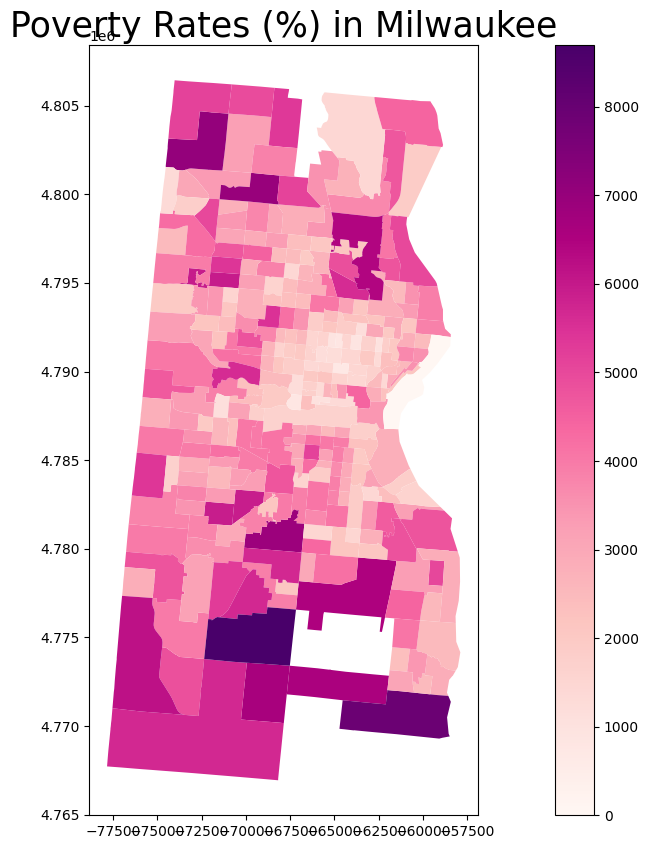

In [40]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# Plot data
# Source: https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
final_df.plot(column = "B01003_001E",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)


# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('Poverty Rates (%) in Milwaukee', fontdict = {'fontsize': '25', 'fontweight' : '3'})

In [43]:
final_df.to_csv('data/MilwaukeeCensus.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'data'